In [4]:
# Importación de librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
import heapq


In [5]:

# Definición del grafo del metro (simplificado para demostración)
# Los nodos representan estaciones de transbordo o terminales y las aristas los caminos entre ellos
# El peso de las aristas representa el número de estaciones intermedias
grafo_metro = {
    "Universidad": {"Zapata": 4},
    "Zapata": {"Universidad": 4, "Mixcoac": 2},
    "Mixcoac": {"Zapata": 2, "Barranca_del_Muerto": 0},
    "Barranca_del_Muerto": {"Mixcoac": 0}
}

In [6]:


# Creación del grafo utilizando NetworkX
G_metro = nx.Graph()
for estacion, vecinos in grafo_metro.items():
    for vecino, estaciones in vecinos.items():
        G_metro.add_edge(estacion, vecino, weight=estaciones)

# Función para visualizar el grafo
def dibujar_grafo(G):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Mapa del Metro (Simplificado)')
    plt.show()

# Llamada a la función para dibujar el grafo (comentada para evitar ejecución aquí)
# dibujar_grafo(G_metro)

# Implementación del algoritmo de costo uniforme para encontrar la ruta más corta
def costo_uniforme_con_mensaje(inicio, objetivo, grafo):
    cola_prioridad = []
    heapq.heappush(cola_prioridad, (0, inicio, [inicio]))
    visitados = set()
    
    while cola_prioridad:
        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
        if nodo_actual == objetivo:
            mensaje = f"Para llegar de {inicio} a {objetivo} debes de tomar la siguiente ruta: {' → '.join(camino)} con un costo de {costo_actual} estaciones."
            return costo_actual, camino, mensaje
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino, costo in grafo[nodo_actual].items():
                if vecino not in visitados:
                    nuevo_costo = costo_actual + costo
                    nuevo_camino = camino + [vecino]
                    heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nuevo_camino))

    mensaje = f"No se encontró un camino desde {inicio} hasta {objetivo}."
    return float('inf'), [], mensaje

In [7]:
# Input de usuario para definir la estación de inicio y la de destino
inicio = input('Estación de inicio: ')
objetivo = input('Estación de destino: ')

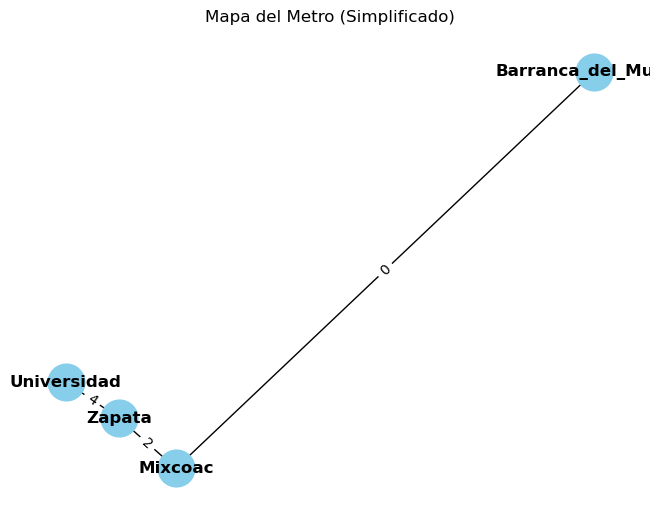

In [8]:

# Prueba del algoritmo con las estaciones "Universidad" y "Barranca_del_Muerto"
costo_uniforme(inicio, objetivo, grafo_metro)
dibujar_grafo(G_metro)


